In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure in 0 and no total charges are recorded ->

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Checking for any null values->

In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Checking for any duplicate values in customerID column that is supposed to be unique ->

In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

#converting 0/1 values in senior citizen to yes/no for better understandability ->

In [9]:
def convo(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convo)

#number of customers that have churned out ->

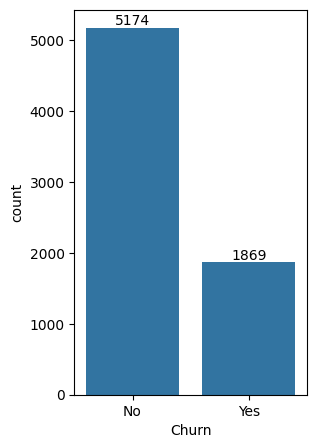

In [10]:
plt.figure(figsize = (3,5))
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.show()

#percentage values on the basis of churn out ->

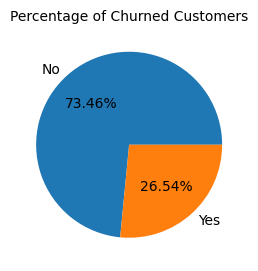

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn" : "count"})
plt.pie(gb["Churn"] , labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

#Customer churn data on the basis of Gender ->

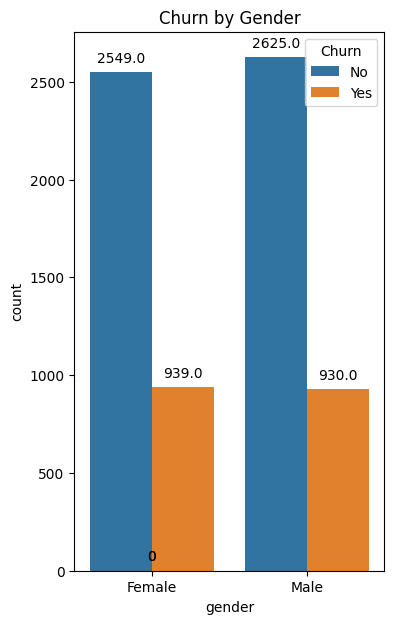

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 7))
ax = sns.countplot(x="gender", data=df, hue="Churn")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')
plt.title("Churn by Gender")
plt.show()


#From the above plot it can be concluded that there is no Gender spefic reason for the churn

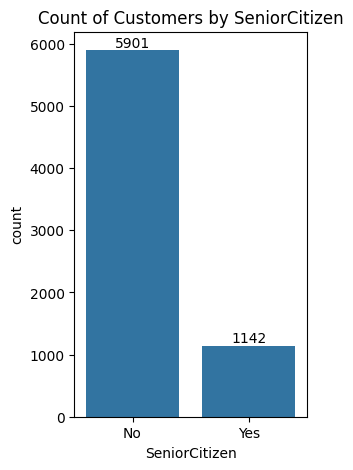

In [13]:
plt.figure(figsize = (3,5))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

#percentage of churn on the basis of whether the user is a Senior Citizen or not ->

<Figure size 200x400 with 0 Axes>

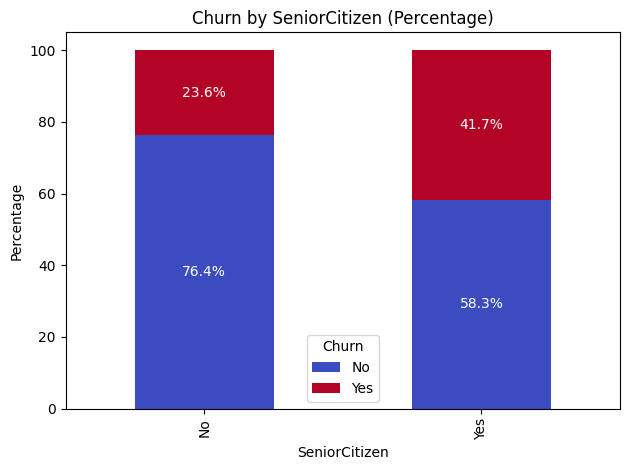

In [14]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(2, 4))
ax = percentage_data.plot(kind='bar', stacked=True, colormap='coolwarm')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', color='white', fontsize=10)

plt.title("Churn by SeniorCitizen (Percentage)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()

#From the plot we conclude a the Senior Citizen is more likely to churn out 

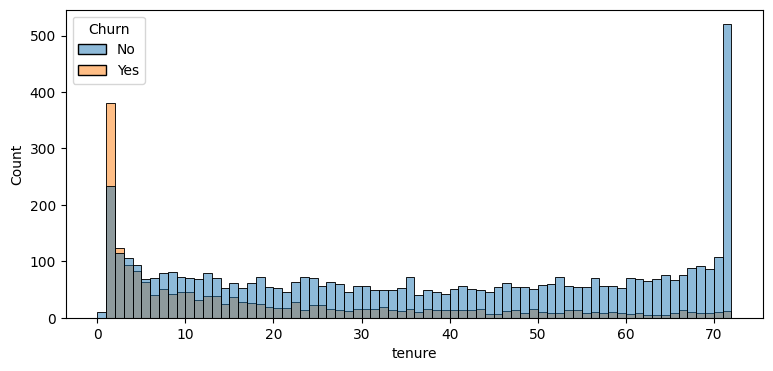

In [15]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df , hue = "Churn" , bins = 72)
plt.show()

#New customers generally with a tenure of 0-2 months are more likely to churn out

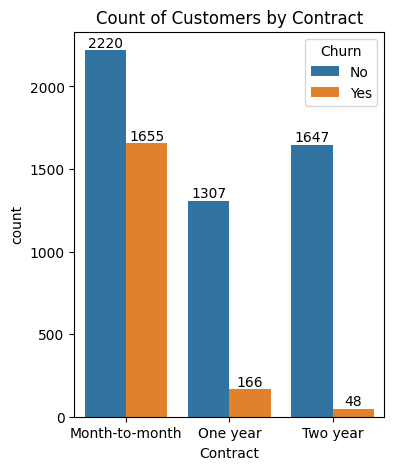

In [20]:
plt.figure(figsize = (4,5))
ax = sns.countplot(x = "Contract" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.show()

#people with month-to-month contract are nore likely to churn

In [17]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#plotting the countplot on the basis of the following columns ->
'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'

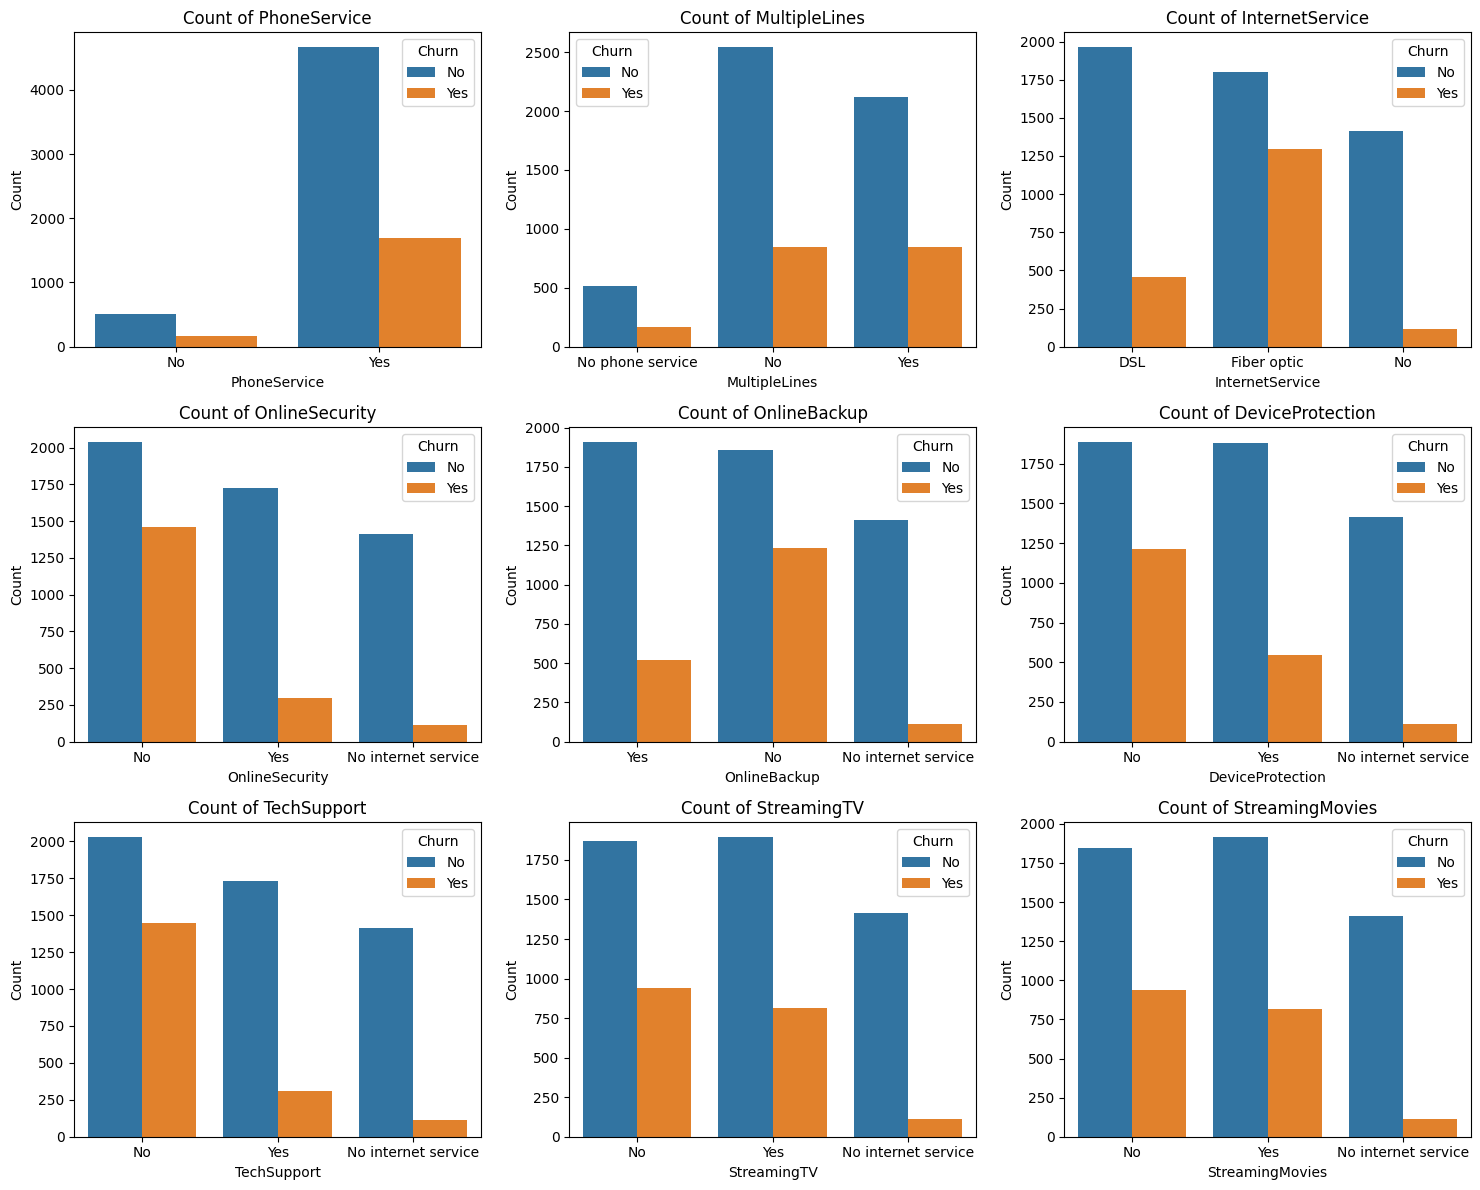

In [18]:
# List of the columns you want to plot
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up a 3x3 grid for subplots (since there are 9 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten axes to make indexing easier
axes = axes.flatten()

# Loop over the columns and plot each countplot in the corresponding subplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i] , hue = df["Churn"])
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust the layout so that the subplots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


#the majority of customers who do not churn tend to have services like phoneservice , internet service(particularly DSL) , and OnlineSecurity enabled.For services like onlineBackup , techsupport , and streamingTV ,churn rates are noticeably higher when these services are not used or are unavailable 

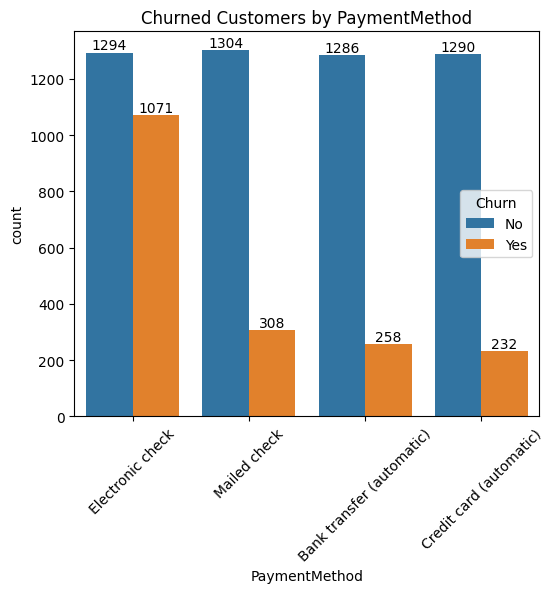

In [19]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned Customers by PaymentMethod")
plt.show()

#customer is likely to churn when he is using electronic check method 